In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install -qr '/content/drive/MyDrive/YOLO_V5/yolov5/requirements.txt'  # install dependencies

     |████████████████████████████████| 645kB 10.8MB/s 


In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
import pandas as pd
from sklearn.metrics import classification_report
%matplotlib inline

In [ ]:
output = !python '/content/drive/MyDrive/YOLO_V5/yolov5/detect.py' --source '/content/drive/MyDrive/YOLO_V5/Data/images/valid/be53e067-4804-4ffa-9fb7-d7855ad3bf62.jpg' --weights '/content/drive/MyDrive/YOLO_V5/runs/train/PneumoniaTrial12/weights/best.pt' --img-size 1024 --device 'cpu' --conf-thres 0.20 --iou-thres 0.20 --save-txt --project '/content/drive/MyDrive/YOLO_V5/yolov5/output' --name 'Pred'

In [ ]:
def display_results(output,act_csv_path,):
  img_width=1024
  img_height=1024
  target = output[-2][0]
  label_output_folder = output[-2].split("/")[-2]
  content = output[0]

  if "source" in content:
    start=content.index("source")

  if "jpg" in content:
    end=content.index("jpg")
    end=end-1

  img= content[start:end]
  img=img.split("/")[-1]

  if target=='1':
    print("Detected Pneumonia")

    with open('/content/drive/MyDrive/YOLO_V5/yolov5/output/'+label_output_folder+'/labels/'+img+'.txt','r') as f:
      output = f.readlines()[0]
      outputs = output.split(" ")

      x_width_norm = float(outputs[3])
      width = x_width_norm * img_width

      y_height_norm = float(outputs[4][:-2])
      height = y_height_norm * img_height

      x_center_norm = float(outputs[1])
      x_min = (x_center_norm*img_width*2)-width

      y_center_norm = float(outputs[2])
      y_min = (y_center_norm*img_height*2)-height

  else:
    print("No Pneumonia Detected")

  

  #print(x_min,y_min,width,height)
  df=pd.read_csv(act_csv_path)

  for _,row in df[df['patientId'] == img].iterrows():
    Target_Actual = row.Target
    x_min_act = row.x
    y_min_act = row.y
    width_act = row.width
    height_act = row.height

  if Target_Actual==1:
    print("Actual Result - Pneumonia")

    x_max_act = width_act + x_min_act
    y_max_act = height_act + y_min_act

  else:
    print("Actual Result - Normal")

  #print(x_min_act,y_min_act,width_act,height_act)

  ## Location of the input image which is sent to model's prediction ##
  image = plt.imread('/content/drive/MyDrive/YOLO_V5/Data/images/valid/'+img+'.jpg')

  # read and plot the image

  fig = plt.figure()

  #add axes to the image
  ax_pred = fig.add_subplot(1,2,1)
  plt.imshow(image,cmap='gray')
  plt.title("PredictedResults")

  ax_actual = fig.add_subplot(1,2,2)
  plt.imshow(image,cmap='gray')
  plt.title("ActualResults")

  x_max = width + x_min
  y_max = height + y_min
      
  # assign different color to different classes of objects
  if target=='1':
    edgecolor = 'r'
    ax_pred.annotate('Pneumoia', xy=(x_max-40,y_min+20))
  else:
    edgecolor = 'g'
    ax_pred.annotate('Normal', xy=(x_max-40,y_min+20))

  if Target_Actual==1:
    edgecolor = 'r'
    ax_actual.annotate('Pneumoia', xy=(x_max_act-40,y_min_act+20))
  elif Target_Actual==0:
    edgecolor = 'g'
    ax_actual.annotate('Platelets', xy=(x_max_act-40,y_min_act+20))
          
  # add bounding boxes to the image
  rect_pred = patches.Rectangle((x_min,y_min), width, height, edgecolor = edgecolor, facecolor = 'none')

  rect_act = patches.Rectangle((x_min_act,y_min_act), width_act, height_act, edgecolor = edgecolor, facecolor = 'none')
      
  ax_pred.add_patch(rect_pred)

  ax_actual.add_patch(rect_act)

Detected Pneumonia
Actual Result - Pneumonia


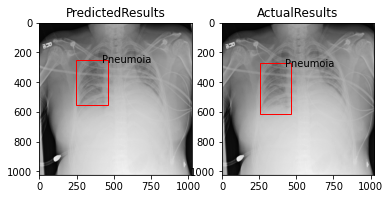

In [ ]:
act_csv_path= "/content/drive/MyDrive/YOLO_V5/Data/stage_2_train_labels.csv"
display_results(output,act_csv_path)

In [ ]:
outputs = !python '/content/drive/MyDrive/YOLO_V5/yolov5/detect.py' --source '/content/drive/MyDrive/YOLO_V5/Data/images/valid/' --weights '/content/drive/MyDrive/YOLO_V5/runs/train/PneumoniaTrial12/weights/best.pt' --img-size 1024 --device 'cpu' --conf-thres 0.20 --iou-thres 0.20 --save-txt --project '/content/drive/MyDrive/YOLO_V5/yolov5/output' --name 'Pred'

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='cpu', exist_ok=False, img_size=1024, iou_thres=0.2, name='Pred', project='/content/drive/MyDrive/YOLO_V5/yolov5/output', save_conf=False, save_txt=True, source='/content/drive/MyDrive/YOLO_V5/Data/images/valid/', update=False, view_img=False, weights=['/content/drive/MyDrive/YOLO_V5/runs/train/PneumoniaTrial12/weights/best.pt'])
YOLOv5  torch 1.8.0+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
image 1/2972 /content/drive/MyDrive/YOLO_V5/Data/images/valid/be27354e-3de7-4420-ae86-05fcc2e9218d.jpg: 1024x1024 Done. (1.206s)
image 2/2972 /content/drive/MyDrive/YOLO_V5/Data/images/valid/be2a8801-3cc0-4c24-a73a-a1e13ff94948.jpg: 1024x1024 Done. (1.176s)
image 3/2972 /content/drive/MyDrive/YOLO_V5/Data/images/valid/be2edd9b-3f12-4399-bec5-9371c8920a29.jpg: 1024x1024 1 Pneumonia, Done. (1.149s)
image 4/2972 /content/drive/MyDrive/YOLO_V5/Data/images/valid/be3

In [ ]:
outputs

["Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='cpu', exist_ok=False, img_size=1024, iou_thres=0.2, name='Pred', project='/content/drive/MyDrive/YOLO_V5/yolov5/output', save_conf=False, save_txt=True, source='/content/drive/MyDrive/YOLO_V5/Data/images/valid/', update=False, view_img=False, weights=['/content/drive/MyDrive/YOLO_V5/runs/train/PneumoniaTrial12/weights/best.pt'])",
 'YOLOv5  torch 1.8.0+cu101 CPU',
 '',
 'Fusing layers... ',
 'Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS',
 'image 1/2972 /content/drive/MyDrive/YOLO_V5/Data/images/valid/be27354e-3de7-4420-ae86-05fcc2e9218d.jpg: 1024x1024 Done. (1.206s)',
 'image 2/2972 /content/drive/MyDrive/YOLO_V5/Data/images/valid/be2a8801-3cc0-4c24-a73a-a1e13ff94948.jpg: 1024x1024 Done. (1.176s)',
 'image 3/2972 /content/drive/MyDrive/YOLO_V5/Data/images/valid/be2edd9b-3f12-4399-bec5-9371c8920a29.jpg: 1024x1024 1 Pneumonia, Done. (1.149s)',
 'image 4/2972 /content/drive/MyD

In [ ]:
# Taking the folder name where the bounding box txt files are saved
label_output_folder = outputs[-2].split("/")[-2]

target_pred = []
target_act = []

Predicted_Imgs = []

# Dataframe of the csv file having the actual labels and bpounding box of all images
df = pd.read_csv("/content/drive/MyDrive/YOLO_V5/Data/stage_2_train_labels.csv")

# Getting the image name from each text file
imgs = os.listdir('/content/drive/MyDrive/YOLO_V5/yolov5/output/'+label_output_folder+'/labels/')

# Looping through each text file and get the Output and store it in target_pred list
for img in imgs:
  img_2 = img[:-4]+'.jpg'
  Predicted_Imgs.append(img_2) # This is done, as YOLO does not output the text files which are of class 0 with bounding box values(0,0,0,0). Hence we are doing this
  with open('/content/drive/MyDrive/YOLO_V5/yolov5/output/'+label_output_folder+'/labels/'+img,'r') as f:
    output = f.readlines()[0]
    target = int(output.split(" ")[0])
    target_pred.append(target)

# Storing all the validation images in a list
All_Valid_Imgs = os.listdir('/content/drive/MyDrive/YOLO_V5/Data/images/valid/')

# For all the validation images available, take the image which the model has predicted as pneumonia and take the actual output of it and store it in list target_act

for img in imgs:
  img_jpg = img[:-4]
  for _,row in df[df['patientId'] == img_jpg].iterrows():
    Target_Actual = int(row.Target)
  target_act.append(Target_Actual)

# Now we have the target_act list with images which have been predicted as pneumonia by the model
# We also need the actuals of the images, which the model predicted as Normal
for val_img in All_Valid_Imgs:
  if val_img not in Predicted_Imgs:
    val_img_jpg = val_img[:-4]
    for _,row in df[df['patientId'] == val_img_jpg].iterrows():
      Target_Actual_2 = int(row.Target)
    target_act.append(Target_Actual_2)

# we are just extending our predicted list with 0's 
list2 = [0]*(len(target_act)-len(target_pred))
target_pred.extend(list2)

In [ ]:
print(len(target_act))
print(len(target_pred))

2972
2972


In [ ]:
pneumonia_act=0
Normal_act=0
pneumonia_pred=0
Normal_pred=0

for x in target_act:
  if x==1:
    pneumonia_act+=1
  else:
    Normal_act+=1

for x in target_pred:
  if x==1:
    pneumonia_pred+=1
  else:
    Normal_pred+=1

print("Actual and Predicted count of Pneumonia cases - "+str(pneumonia_act),str(pneumonia_pred))

print("Actual and Predicted count of Normal cases - "+str(Normal_act),str(Normal_pred))

Actual and Predicted count of Pneumonia cases - 1202 450
Actual and Predicted count of Normal cases - 1770 2522


In [ ]:
print(classification_report(target_act,target_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      1770
           1       0.99      0.37      0.54      1202

    accuracy                           0.74      2972
   macro avg       0.84      0.68      0.68      2972
weighted avg       0.82      0.74      0.71      2972



In [ ]:
# Our Model has a very good Precision for Predicting Pneumonia and a bad recall for Predicting Pneumonia. This means, there is a good possibility of 60 percent, that our model might fail in production to predict the pnuemonia cases

# Our Model has decent precision for Normal class and perfect recall for Pneumonia class. 

# We should further improve the recall of the model in predicting the Pneumonia class. Only then the model can be stable to put into production